In [708]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [709]:
df=pd.read_csv('lego_sets.csv')

In [710]:
df.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country
0,6-12,29.99,2.0,277.0,4.0,Catapult into action and take back the eggs fr...,75823.0,Use the staircase catapult to launch Red into ...,Average,Bird Island Egg Heist,4.5,Angry Birds™,4.0,US
1,6-12,19.99,2.0,168.0,4.0,Launch a flying attack and rescue the eggs fro...,75822.0,Pilot Pig has taken off from Bird Island with ...,Easy,Piggy Plane Attack,5.0,Angry Birds™,4.0,US
2,6-12,12.99,11.0,74.0,4.3,Chase the piggy with lightning-fast Chuck and ...,75821.0,Pitch speedy bird Chuck against the Piggy Car....,Easy,Piggy Car Escape,4.3,Angry Birds™,4.1,US
3,12+,99.99,23.0,1032.0,3.6,Explore the architecture of the United States ...,21030.0,Discover the architectural secrets of the icon...,Average,United States Capitol Building,4.6,Architecture,4.3,US
4,12+,79.99,14.0,744.0,3.2,Recreate the Solomon R. Guggenheim Museum® wit...,21035.0,Discover the architectural secrets of Frank Ll...,Challenging,Solomon R. Guggenheim Museum®,4.6,Architecture,4.1,US


In [711]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 14 columns):
ages                 12261 non-null object
list_price           12261 non-null float64
num_reviews          10641 non-null float64
piece_count          12261 non-null float64
play_star_rating     10486 non-null float64
prod_desc            11884 non-null object
prod_id              12261 non-null float64
prod_long_desc       12261 non-null object
review_difficulty    10206 non-null object
set_name             12261 non-null object
star_rating          10641 non-null float64
theme_name           12258 non-null object
val_star_rating      10466 non-null float64
country              12261 non-null object
dtypes: float64(7), object(7)
memory usage: 1.3+ MB


In [712]:
df.isnull().sum()

ages                    0
list_price              0
num_reviews          1620
piece_count             0
play_star_rating     1775
prod_desc             377
prod_id                 0
prod_long_desc          0
review_difficulty    2055
set_name                0
star_rating          1620
theme_name              3
val_star_rating      1795
country                 0
dtype: int64

In [713]:
df['ages'].unique()

array(['6-12', '12+', '7-12', '10+', '5-12', '8-12', '4-7', '4-99', '4+',
       '9-12', '16+', '14+', '9-14', '7-14', '8-14', '6+', '2-5', '1½-3',
       '1½-5', '9+', '5-8', '10-21', '8+', '6-14', '5+', '10-16', '10-14',
       '11-16', '12-16', '9-16', '7+'], dtype=object)

In [714]:
df['list_price'].unique()

array([  29.99  ,   19.99  ,   12.99  ,   99.99  ,   79.99  ,   59.99  ,
         49.99  ,   39.99  ,   34.99  ,  159.99  ,    9.99  ,  199.99  ,
        149.99  ,  119.99  ,   89.99  ,   69.99  ,   24.99  ,   15.99  ,
         14.99  ,    6.99  ,   16.99  ,    7.99  ,    4.99  ,    2.49  ,
        369.99  ,  169.99  ,  279.99  ,  249.99  ,  239.99  ,  139.99  ,
        269.99  ,  129.99  ,   44.99  ,   11.99  ,  349.99  ,    5.99  ,
        109.99  ,   54.99  ,   32.99  ,  197.99  ,   88.99  ,   41.99  ,
         31.99  ,   26.99  ,   21.99  ,    3.99  ,  299.99  ,  754.99  ,
        484.99  ,   36.99  ,  789.99  ,  499.99  ,   84.99  ,  799.99  ,
        289.99  ,  179.99  ,  113.9924,   75.9924,   60.7924,   53.1924,
         45.5924,   37.9924,  189.9924,   30.3924,   22.7924,   12.1524,
        227.9924,  174.7924,  121.5924,   34.1924,   18.9924,   17.4724,
         13.6724,    7.5924,   15.1924,    9.8724,    6.0724,    2.2724,
         91.1924,  379.9924,  303.9924,  288.7924, 

In [715]:
df['num_reviews'].unique()

array([  2.,  11.,  23.,  14.,   7.,  37.,  24.,  53.,  63.,  13.,   1.,
         3.,   5.,  nan,   4.,   6.,   8.,   9.,  10.,  12.,  35.,  45.,
        16.,  89.,  47.,  85.,  40.,  30.,  46., 180.,  27.,  15.,  43.,
        62.,  51.,  99.,  64., 228.,  91., 115., 202., 177., 337.,  66.,
       134.,  77.,  19.,  18.,  32., 171.,  52.,  22.,  17., 130.,  83.,
        79., 367.,  33.,  25.,  38.,  26.,  88.,  29.,  21.,  28.,  84.,
       201.,  31.,  39.,  71.,  56.,  86., 197.,  36.,  94.,  67.,  70.,
       143.,  75.,  57.,  20., 142.,  61.,  87.,  34., 198.,  54.])

In [716]:
df['num_reviews'].fillna(df['num_reviews'].mean(),inplace=True)
df['num_reviews'].unique()


array([  2.        ,  11.        ,  23.        ,  14.        ,
         7.        ,  37.        ,  24.        ,  53.        ,
        63.        ,  13.        ,   1.        ,   3.        ,
         5.        ,  16.82623814,   4.        ,   6.        ,
         8.        ,   9.        ,  10.        ,  12.        ,
        35.        ,  45.        ,  16.        ,  89.        ,
        47.        ,  85.        ,  40.        ,  30.        ,
        46.        , 180.        ,  27.        ,  15.        ,
        43.        ,  62.        ,  51.        ,  99.        ,
        64.        , 228.        ,  91.        , 115.        ,
       202.        , 177.        , 337.        ,  66.        ,
       134.        ,  77.        ,  19.        ,  18.        ,
        32.        , 171.        ,  52.        ,  22.        ,
        17.        , 130.        ,  83.        ,  79.        ,
       367.        ,  33.        ,  25.        ,  38.        ,
        26.        ,  88.        ,  29.        ,  21.  

In [717]:
df['piece_count'].unique()


array([2.770e+02, 1.680e+02, 7.400e+01, 1.032e+03, 7.440e+02, 5.970e+02,
       5.980e+02, 7.800e+02, 4.680e+02, 4.440e+02, 3.860e+02, 3.210e+02,
       3.610e+02, 8.470e+02, 7.080e+02, 2.340e+02, 1.600e+02, 1.490e+02,
       1.410e+02, 1.010e+02, 1.050e+02, 1.130e+02, 1.360e+02, 9.100e+01,
       1.400e+02, 1.430e+02, 1.220e+02, 1.300e+02, 1.190e+02, 1.350e+02,
       1.080e+02, 2.400e+02, 2.090e+02, 1.260e+02, 1.020e+02, 8.900e+01,
       1.180e+02, 1.270e+02, 9.600e+01, 1.090e+02, 9.300e+01, 1.390e+02,
       1.160e+02, 1.510e+02, 9.900e+01, 3.870e+02, 8.880e+02, 6.100e+02,
       1.250e+03, 7.920e+02, 8.130e+02, 8.940e+02, 8.830e+02, 9.190e+02,
       6.630e+02, 7.400e+02, 5.610e+02, 4.260e+02, 3.030e+02, 4.150e+02,
       3.740e+02, 3.370e+02, 2.940e+02, 1.690e+02, 3.470e+02, 2.970e+02,
       3.780e+02, 2.570e+02, 3.440e+02, 3.100e+02, 2.140e+02, 1.920e+02,
       2.490e+02, 2.400e+01, 2.390e+02, 1.900e+02, 1.740e+02, 1.440e+02,
       1.150e+02, 2.010e+02, 8.000e+00, 2.000e+00, 

In [718]:
df['play_star_rating'].unique()


array([4. , 4.3, 3.6, 3.2, 3.7, 4.4, 4.1, 4.2, 3.8, 4.7, 3. , 5. , 2. ,
       nan, 4.6, 2.7, 4.5, 1. , 3.5, 3.3, 3.9, 4.8, 2.9, 3.4, 4.9, 2.5,
       2.2, 2.3, 2.8, 3.1, 2.1])

In [719]:
df['play_star_rating'].fillna(df['play_star_rating'].mean(),inplace=True)


In [720]:
df['play_star_rating'].unique()


array([4.        , 4.3       , 3.6       , 3.2       , 3.7       ,
       4.4       , 4.1       , 4.2       , 3.8       , 4.7       ,
       3.        , 5.        , 2.        , 4.33764066, 4.6       ,
       2.7       , 4.5       , 1.        , 3.5       , 3.3       ,
       3.9       , 4.8       , 2.9       , 3.4       , 4.9       ,
       2.5       , 2.2       , 2.3       , 2.8       , 3.1       ,
       2.1       ])

In [721]:
df['prod_desc'].unique()


array(['Catapult into action and take back the eggs from the Piggy Trike!',
       'Launch a flying attack and rescue the eggs from the Piggy Plane!',
       'Chase the piggy with lightning-fast Chuck and rescue the eggs!',
       'Explore the architecture of the United States Capitol Building!',
       'Recreate the Solomon R. Guggenheim Museum® with LEGO® Architecture!',
       'Celebrate Shanghai with this LEGO® Architecture Skyline set!',
       'Celebrate New York City with this LEGO® Architecture Skyline model!',
       'Recreate Buckingham Palace with LEGO® Architecture!',
       'Celebrate London with this LEGO® Architecture Skyline model!',
       'Celebrate Chicago with this LEGO® Architecture Skyline model!',
       'Experience the grandeur of the Arc de Triomphe!',
       'Build your own LEGO® interpretation of the iconic Eiffel Tower!',
       'Celebrate Sydney with this LEGO® Architecture Skyline model!',
       'Bring your LEGO® creations to life!',
       'Build a LEGO®

In [722]:
df['prod_id'].unique()

array([7.582300e+04, 7.582200e+04, 7.582100e+04, 2.103000e+04,
       2.103500e+04, 2.103900e+04, 2.102800e+04, 2.102900e+04,
       2.103400e+04, 2.103300e+04, 2.103600e+04, 2.101900e+04,
       2.103200e+04, 1.710100e+04, 4.159700e+04, 4.161400e+04,
       4.161300e+04, 4.160900e+04, 4.160800e+04, 4.160400e+04,
       4.160500e+04, 4.160600e+04, 4.160700e+04, 4.148500e+04,
       4.027000e+04, 4.159900e+04, 4.159800e+04, 4.160300e+04,
       4.160200e+04, 4.160000e+04, 4.160100e+04, 4.161100e+04,
       4.161000e+04, 4.027100e+04, 4.148700e+04, 4.148800e+04,
       4.159400e+04, 4.148600e+04, 4.158500e+04, 4.159000e+04,
       4.159300e+04, 4.159200e+04, 4.159500e+04, 4.159600e+04,
       4.158800e+04, 4.159100e+04, 4.158700e+04, 4.158600e+04,
       6.017500e+04, 6.005200e+04, 6.005100e+04, 6.016200e+04,
       6.016700e+04, 6.016100e+04, 6.014100e+04, 6.018800e+04,
       6.011000e+04, 6.017400e+04, 6.016900e+04, 6.014000e+04,
       6.016000e+04, 6.017300e+04, 6.016600e+04, 6.0139

In [723]:

df['prod_long_desc'].unique()


array(["Use the staircase catapult to launch Red into the air and race after the piggy, who is speeding off in the Piggy Trike with the eggs. Help him take the eggs out of the trike's box in this hilarious set, which also features Matilda's House to help Red relax, and a spinning Billy the Sign, based on The Angry BirdsTM Movie. Includes 3 figures.\nIncludes 3 figures: Red, Matilda and Biker Pig.\nBird Island Egg Heist features Matilda's House with a staircase catapult and easel, plus a branch, plants, flower elements and a Piggy Trike.\nPiggy Trike features a giant front wheel, 2 balloons and a box at the rear for eggs.\nAccessory elements include spinning Billy the Sign, 4 eggs and 2 bird nests.\nUse Red to get into a fight with Billy the Sign to make it spin!\nPlace Red inside Matilda's House next to the easel and help him paintto relieve his anger!\nPlace the eggs in the Piggy Trike's box and watch the piggy zoom off.\nPosition Red on the staircase catapult and launch him at the Pi

In [724]:
df['review_difficulty'].isnull().sum()

2055

In [725]:
df['review_difficulty'].mode()
df['review_difficulty'].fillna(value="Easy",inplace=True)

In [726]:
df['set_name'].unique()


array(['Bird Island Egg Heist', 'Piggy Plane Attack', 'Piggy Car Escape',
       'United States Capitol Building', 'Solomon R. Guggenheim Museum®',
       'Shanghai', 'New York City', 'Buckingham Palace', 'London',
       'Chicago', 'Arc de Triomphe', 'The Eiffel Tower', 'Sydney',
       'BOOST Creative Toolbox', 'Go Brick Me', 'Owen & Blue',
       'Mr. Incredible & Frozone', 'Chewbacca™', 'Han Solo™',
       'Iron Man MK50', 'Thanos', 'Star-Lord', 'Gamora', 'Finn',
       "Valentine's Bee", 'Wonder Woman™', 'The Flash™', 'Kylo Ren™',
       'Rey', 'Aquaman™', 'Cyborg™', 'Marty McFly & Doc Brown',
       'Tactical Batman™ & Superman™', 'Easter Bunny', 'Lloyd',
       'Master Wu', 'Captain Armando Salazar', 'Captain Phasma™',
       'Batman™', 'Iron Man', 'Captain Jack Sparrow', 'The Hulk', 'Belle',
       'Beast', 'The Joker™', 'Black Widow', 'Robin™', 'Batgirl™',
       'Mountain River Heist', 'Cargo Train',
       'High-speed Passenger Train', 'Jungle Air Drop Helicopter',
       'C

In [727]:
df['star_rating'].unique()


array([4.5, 5. , 4.3, 4.6, 4.9, 4.2, 4.7, 4.8, 4.4, 3.4, 3. , 4. , nan,
       3.7, 3.3, 4.1, 3.9, 2.5, 3.8, 3.5, 3.6, 3.2, 2.6, 2.2, 2.7, 2.8,
       1.8, 2.9])

In [728]:
df['star_rating'].fillna(df['star_rating'].mean(),inplace=True)
df['star_rating'].unique()

array([4.5       , 5.        , 4.3       , 4.6       , 4.9       ,
       4.2       , 4.7       , 4.8       , 4.4       , 3.4       ,
       3.        , 4.        , 4.51413401, 3.7       , 3.3       ,
       4.1       , 3.9       , 2.5       , 3.8       , 3.5       ,
       3.6       , 3.2       , 2.6       , 2.2       , 2.7       ,
       2.8       , 1.8       , 2.9       ])

In [729]:
df['theme_name'].unique()


array(['Angry Birds™', 'Architecture', 'BOOST', 'BrickHeadz', 'City',
       'Juniors', 'Classic', 'Creator 3-in-1', 'Creator Expert',
       'THE LEGO® BATMAN MOVIE', 'DC Comics™ Super Heroes', 'DIMENSIONS™',
       'DC Super Hero Girls', 'Disney™', 'DUPLO®', 'Elves', 'Friends',
       'Ghostbusters™', 'Ideas', 'Indoraptor Rampage at Lockwood Estate',
       'Carnotaurus Gyrosphere Escape', 'T. rex Transport',
       'Jurassic Park Velociraptor Chase', 'Dilophosaurus Outpost Attack',
       "Blue's Helicopter Pursuit", 'Stygimoloch Breakout',
       'Pteranodon Chase', 'Marvel Super Heroes', 'MINDSTORMS®',
       'Minecraft™', 'Minifigures', 'NEXO KNIGHTS™',
       'THE LEGO® NINJAGO® MOVIE™', 'NINJAGO®', 'SERIOUS PLAY®',
       'Speed Champions', 'Star Wars™', 'Technic', 'Power Functions',
       'LEGO® Creator 3-in-1', nan], dtype=object)

In [730]:
df['val_star_rating'].unique()


array([4. , 4.1, 4.3, 4.4, 4.5, 3.6, 4.2, 3.5, 4.8, 5. , nan, 4.7, 3. ,
       4.6, 4.9, 3.8, 3.3, 2.5, 2.7, 2.2, 2.3, 2.8, 2. , 2.9, 3.2, 3.9,
       3.4, 2.6, 3.7, 1. , 1.8, 2.4, 1.9, 3.1])

In [731]:
df['val_star_rating'].fillna(df['val_star_rating'].mean(),inplace=True)
df['val_star_rating'].unique()

array([4.        , 4.1       , 4.3       , 4.4       , 4.5       ,
       3.6       , 4.2       , 3.5       , 4.8       , 5.        ,
       4.22896044, 4.7       , 3.        , 4.6       , 4.9       ,
       3.8       , 3.3       , 2.5       , 2.7       , 2.2       ,
       2.3       , 2.8       , 2.        , 2.9       , 3.2       ,
       3.9       , 3.4       , 2.6       , 3.7       , 1.        ,
       1.8       , 2.4       , 1.9       , 3.1       ])

In [732]:
df['country'].unique()

array(['US', 'AU', 'AT', 'BE', 'CA', 'CH', 'CZ', 'DE', 'DN', 'ES', 'FI',
       'FR', 'GB', 'IE', 'IT', 'LU', 'NO', 'NL', 'NZ', 'PL', 'PT'],
      dtype=object)

In [733]:
df['theme_name'].mode()
df['theme_name'].fillna(value="Star Wars™",inplace=True)

In [734]:
df.isnull().sum()

ages                   0
list_price             0
num_reviews            0
piece_count            0
play_star_rating       0
prod_desc            377
prod_id                0
prod_long_desc         0
review_difficulty      0
set_name               0
star_rating            0
theme_name             0
val_star_rating        0
country                0
dtype: int64

In [735]:
del df['prod_desc']

In [736]:
del df['prod_id']

In [737]:
del df['prod_long_desc']

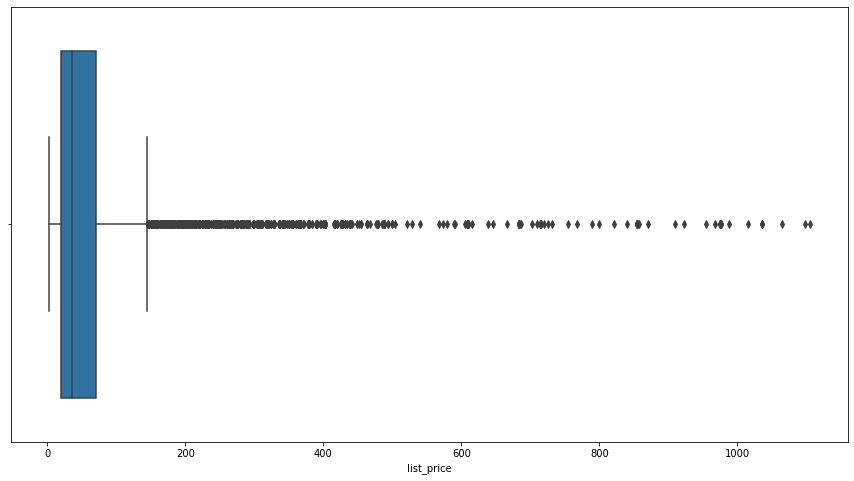

In [738]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x="list_price")
plt.show()

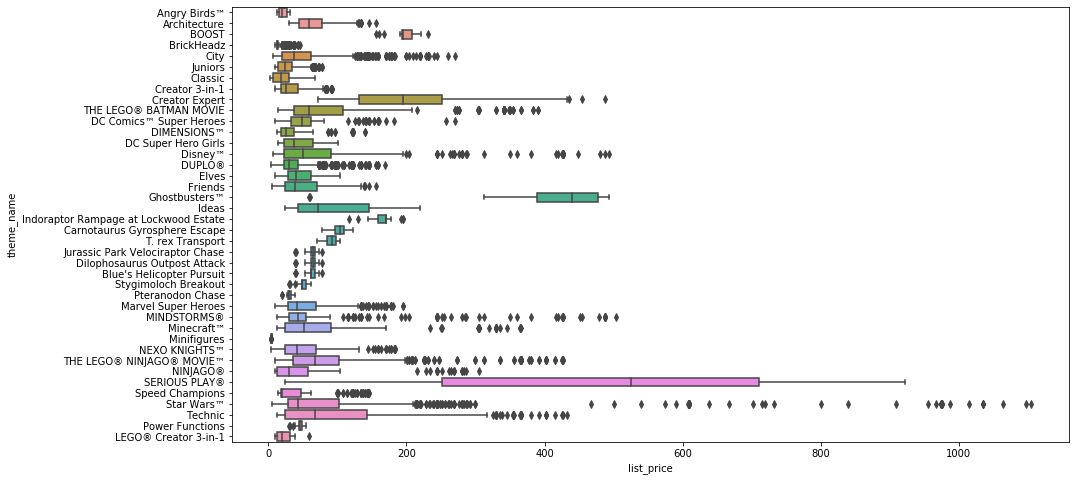

In [775]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x="list_price",y="theme_name")
plt.show()

In [740]:
df_cat = df.select_dtypes(object)
df_num = df.select_dtypes(["int64", "float64"])

In [741]:
from scipy.stats import skew
df_cat

,ages,review_difficulty,set_name,theme_name,country
0,6-12,Average,Bird Island Egg Heist,Angry Birds™,US
1,6-12,Easy,Piggy Plane Attack,Angry Birds™,US
2,6-12,Easy,Piggy Car Escape,Angry Birds™,US
3,12+,Average,United States Capitol Building,Architecture,US
4,12+,Challenging,Solomon R. Guggenheim Museum®,Architecture,US
...,...,...,...,...,...
12256,7-14,Easy,Manta Ray Bomber,THE LEGO® NINJAGO® MOVIE™,PT
12257,7-14,Easy,Piranha Attack,THE LEGO® NINJAGO® MOVIE™,PT
12258,7-14,Easy,NINJAGO® City Chase,THE LEGO® NINJAGO® MOVIE™,PT
12259,6-14,Very Easy,Lloyd - Spinjitzu Master,THE LEGO® NINJAGO® MOVIE™,PT


list_price : 4.680102343989678


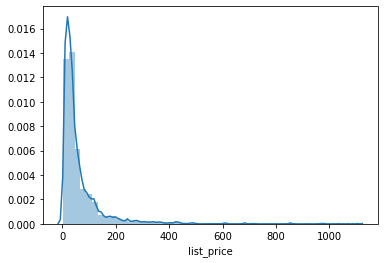

-------------------------------------------------------------
num_reviews : 5.648507734959105


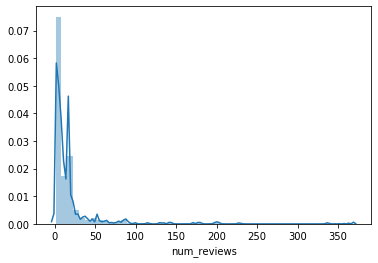

-------------------------------------------------------------
piece_count : 3.9675723265890634


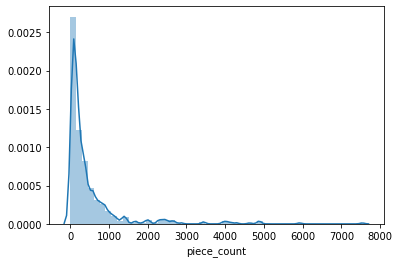

-------------------------------------------------------------
play_star_rating : -1.8086429986343002


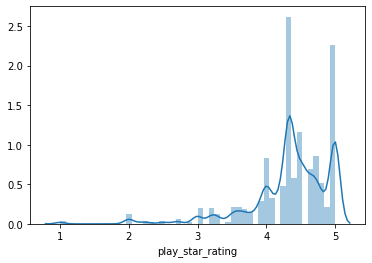

-------------------------------------------------------------
star_rating : -1.7220500682828555


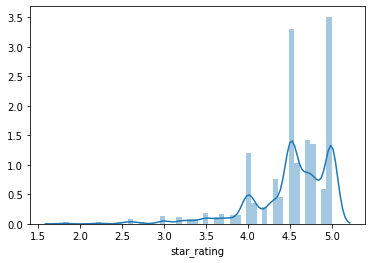

-------------------------------------------------------------
val_star_rating : -1.317133719568732


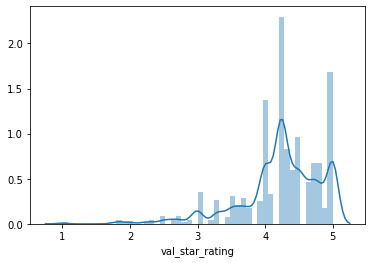

-------------------------------------------------------------


In [742]:
for col in df_num:
    print(col,":", skew(df_num[col]))
    sns.distplot(df_num[col])
    plt.show()
    print("-------------------------------------------------------------")

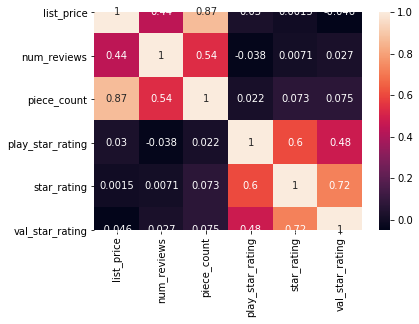

In [743]:
sns.heatmap(df_num.corr(), annot=True)
plt.show()
#piece_count,play_star_rating,star_rating,val_star_rating,

In [744]:
df_num['num_reviews'].min()

1.0

C:\Users\Mohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


2.5271659477024624


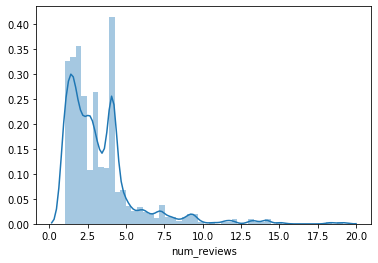

In [745]:
df_num['num_reviews'] = np.sqrt(df_num['num_reviews'])
print(skew(df_num['num_reviews']))
sns.distplot(df_num['num_reviews'])
plt.show()

C:\Users\Mohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0.8806221430831367


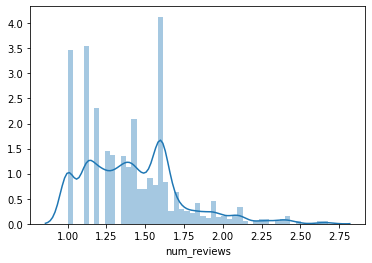

In [746]:
df_num['num_reviews'] = np.cbrt(df_num['num_reviews'])
print(skew(df_num['num_reviews']))
sns.distplot(df_num['num_reviews'])
plt.show()

C:\Users\Mohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0.285729804015103


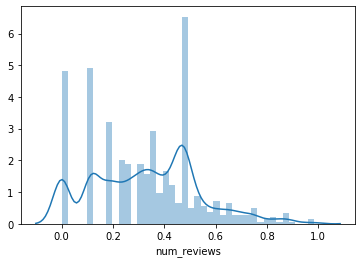

In [747]:
df_num['num_reviews'] = np.log(df_num['num_reviews'])
print(skew(df_num['num_reviews']))
sns.distplot(df_num['num_reviews'])

plt.show()

C:\Users\Mohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0.37080094233959987


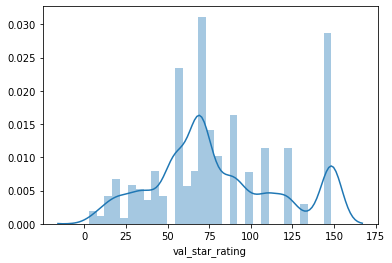

In [748]:
df_num['val_star_rating'] = np.exp(df_num['val_star_rating'])
print(skew(df_num['val_star_rating']))
sns.distplot(df_num['val_star_rating'])
plt.show()

C:\Users\Mohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0.11187845701271543


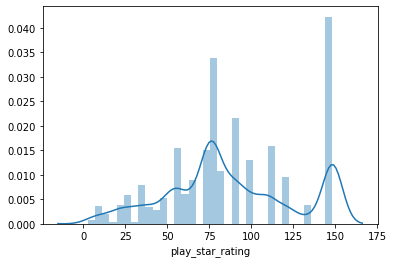

In [749]:
df_num['play_star_rating'] = np.exp(df_num['play_star_rating'])
print(skew(df_num['play_star_rating']))
sns.distplot(df_num['play_star_rating'])
plt.show()
# df_num['play_star_rating'].min()

0.37080094233959987


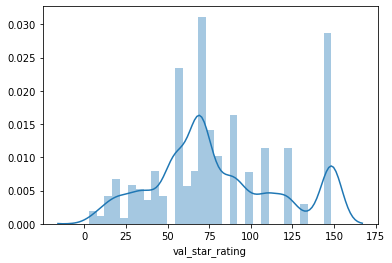

In [750]:
print(skew(df_num['val_star_rating']))
sns.distplot(df_num['val_star_rating'])
plt.show()

In [751]:
from sklearn.preprocessing import LabelEncoder


In [752]:
df_cat.isnull().sum()

ages                 0
review_difficulty    0
set_name             0
theme_name           0
country              0
dtype: int64

In [753]:
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])
df_cat.head()

C:\Users\Mohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ages,review_difficulty,set_name,theme_name,country
0,19,0,93,0,20
1,19,2,483,0,20
2,19,2,482,0,20
3,5,0,706,1,20
4,5,1,574,1,20


In [754]:
df_new = pd.concat([df_num, df_cat], axis=1)
df_new.head()

,list_price,num_reviews,piece_count,play_star_rating,star_rating,val_star_rating,ages,review_difficulty,set_name,theme_name,country
0,29.99,0.115525,277.0,54.598150,4.5,54.598150,19,0,93,0,20
1,19.99,0.115525,168.0,54.598150,5.0,54.598150,19,2,483,0,20
2,12.99,0.399649,74.0,73.699794,4.3,60.340288,19,2,482,0,20
3,99.99,0.522582,1032.0,36.598234,4.6,73.699794,5,0,706,1,20
4,79.99,0.439843,744.0,24.532530,4.6,60.340288,5,1,574,1,20


In [755]:
df_mm = df_new.copy()
df_ss = df_new.copy()

In [756]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [757]:
for col in df_mm:
    mm = MinMaxScaler()
    df_mm[col] = mm.fit_transform(df_mm[[col]])
df_mm.head()

,list_price,num_reviews,piece_count,play_star_rating,star_rating,val_star_rating,ages,review_difficulty,set_name,theme_name,country
0,0.025138,0.117376,0.036605,0.356086,0.84375,0.356086,0.633333,0.00,0.125676,0.000000,1.0
1,0.016069,0.117376,0.022149,0.356086,1.00000,0.356086,0.633333,0.50,0.652703,0.000000,1.0
2,0.009720,0.406054,0.009682,0.487193,0.78125,0.395498,0.633333,0.50,0.651351,0.000000,1.0
3,0.088625,0.530957,0.136737,0.232540,0.87500,0.487193,0.166667,0.00,0.954054,0.025641,1.0
4,0.070486,0.446892,0.098541,0.149726,0.87500,0.395498,0.166667,0.25,0.775676,0.025641,1.0


In [758]:
for col in df_ss:
    ss = StandardScaler()
    df_ss[col] = ss.fit_transform(df_ss[[col]])
df_ss.head()

,list_price,num_reviews,piece_count,play_star_rating,star_rating,val_star_rating,ages,review_difficulty,set_name,theme_name,country
0,-0.382184,-1.019820,-0.262205,-0.859865,-0.029242,-0.654124,0.281288,-1.245881,-1.372735,-1.711917,1.614284
1,-0.490907,-1.019820,-0.394273,-0.859865,1.005203,-0.654124,0.281288,0.430930,0.483893,-1.711917,1.614284
2,-0.567013,0.341282,-0.508167,-0.363394,-0.443020,-0.504218,0.281288,0.430930,0.479132,-1.711917,1.614284
3,0.378879,0.930195,0.652580,-1.327702,0.177647,-0.155450,-1.422218,-1.245881,1.545503,-1.628498,1.614284
4,0.161432,0.533831,0.303629,-1.641302,0.177647,-0.504218,-1.422218,-0.407476,0.917106,-1.628498,1.614284


Intercept=67.52836485103947
Slope=[-4.55668845  0.09457443  0.24206322 -6.9390913  -0.34467072 -0.82164953
 -3.36050556 -0.00972175  0.50071804  0.17620383]
MSE=2135.434878222989
R2=0.7781196379806138


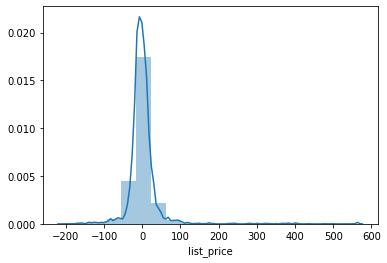

In [759]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


x=df_new[['num_reviews','piece_count','play_star_rating','star_rating','val_star_rating','ages','review_difficulty','set_name','theme_name','country']]
y=df_new['list_price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
lr=LinearRegression()
lr.fit(x_train,y_train)
print("Intercept={}\nSlope={}".format(lr.intercept_,lr.coef_))
y_hat=lr.predict(x_test)
print("MSE={}\nR2={}".format(mean_squared_error(y_test,y_hat),r2_score(y_test,y_hat)))
residuals=y_test-y_hat
sns.distplot(residuals,bins=20)
plt.show()

Intercept=0.04768853011774993
Slope=[-0.0040675   0.6467375   0.03198571 -0.02013889 -0.04554405 -0.02235583
 -0.01219123 -0.00652468  0.01771091  0.00319616]
MSE=0.0017565165502662651
R2=0.7781196379806139


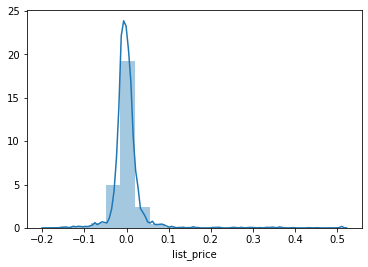

In [760]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


x=df_mm[['num_reviews','piece_count','play_star_rating','star_rating','val_star_rating','ages','review_difficulty','set_name','theme_name','country']]
y=df_mm['list_price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
lr=LinearRegression()
lr.fit(x_train,y_train)
print("Intercept={}\nSlope={}".format(lr.intercept_,lr.coef_))
y_hat=lr.predict(x_test)
print("MSE={}\nR2={}".format(mean_squared_error(y_test,y_hat),r2_score(y_test,y_hat)))
residuals=y_test-y_hat
sns.distplot(residuals,bins=20)
plt.show()

Intercept=-0.00405807690327151
Slope=[-0.01034165  0.84864125  0.10125752 -0.03646594 -0.14354239 -0.07341643
 -0.04357854 -0.02220274  0.06526048  0.01184926]
MSE=0.25242414246837
R2=0.7781196379806138


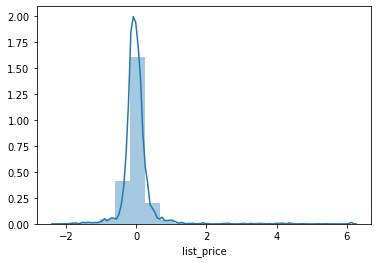

In [761]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


x=df_ss[['num_reviews','piece_count','play_star_rating','star_rating','val_star_rating','ages','review_difficulty','set_name','theme_name','country']]
y=df_ss['list_price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
lr=LinearRegression()
lr.fit(x_train,y_train)
print("Intercept={}\nSlope={}".format(lr.intercept_,lr.coef_))
y_hat=lr.predict(x_test)
print("MSE={}\nR2={}".format(mean_squared_error(y_test,y_hat),r2_score(y_test,y_hat)))
residuals=y_test-y_hat
sns.distplot(residuals,bins=20)
plt.show()

Intercept=67.52836485103947
Slope=[-4.55668845  0.09457443  0.24206322 -6.9390913  -0.34467072 -0.82164953
 -3.36050556 -0.00972175  0.50071804  0.17620383]
MSE=2135.434878222989
R2=0.7781196379806138


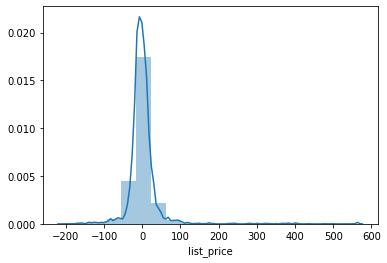

In [762]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


x=df_new[['num_reviews','piece_count','play_star_rating','star_rating','val_star_rating','ages','review_difficulty','set_name','theme_name','country']]
y=df_new['list_price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
lr=LinearRegression()
lr.fit(x_train,y_train)
print("Intercept={}\nSlope={}".format(lr.intercept_,lr.coef_))
y_hat=lr.predict(x_test)
print("MSE={}\nR2={}".format(mean_squared_error(y_test,y_hat),r2_score(y_test,y_hat)))
residuals=y_test-y_hat
sns.distplot(residuals,bins=20)
plt.show()

MSE=918.9531319220547
R2=0.8782487901540768


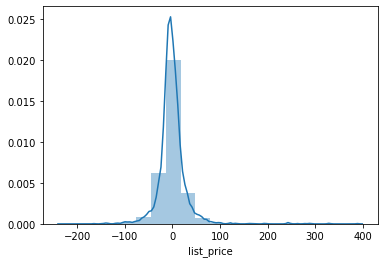

In [763]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(2)
x_poly=pf.fit_transform(x)
x_poly
x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.3)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_hat=lr.predict(x_test)
print("MSE={}\nR2={}".format(mean_squared_error(y_test,y_hat),r2_score(y_test,y_hat)))
residuals=y_test-y_hat
sns.distplot(residuals,bins=20)

MSE=420.21521875931995
R2=0.9548003986111261


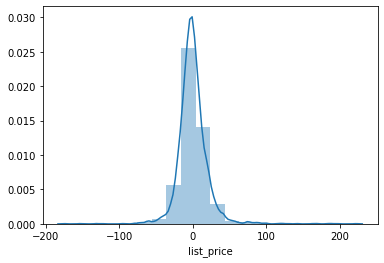

In [764]:
pf = PolynomialFeatures(3)
x_poly=pf.fit_transform(x)
x_poly
x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.3)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_hat=lr.predict(x_test)
print("MSE={}\nR2={}".format(mean_squared_error(y_test,y_hat),r2_score(y_test,y_hat)))
residuals=y_test-y_hat
sns.distplot(residuals,bins=20)

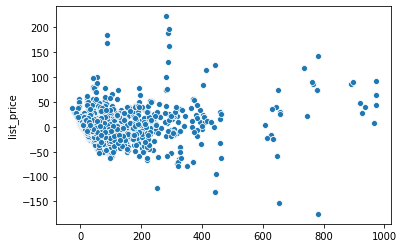

In [765]:
sns.scatterplot(y_hat,residuals)
plt.show()

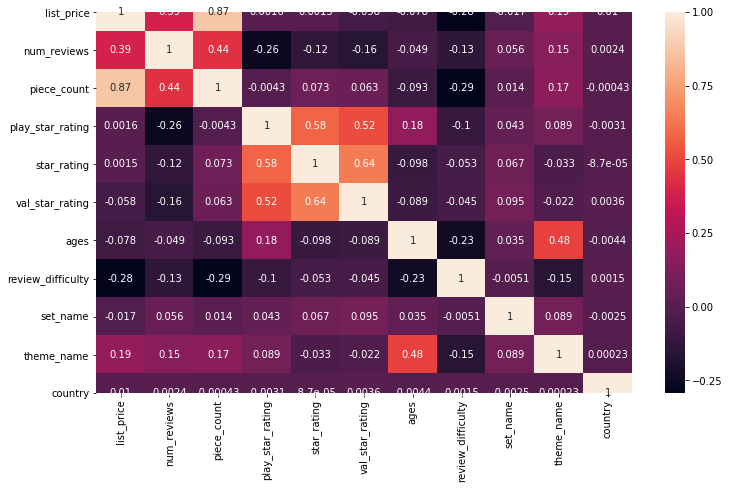

In [766]:
plt.figure(figsize=(12,7))
sns.heatmap(df_new.corr(), annot=True)
plt.show()

MSE=0.0007894595436045676
R2=0.8423247018223419


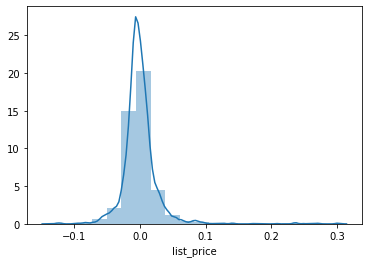

In [767]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


x=df_mm[['num_reviews','piece_count','play_star_rating','star_rating','val_star_rating','ages','review_difficulty','set_name','theme_name','country']]
y=df_mm['list_price']
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(2)
x_poly=pf.fit_transform(x)
x_poly
x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.3)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_hat=lr.predict(x_test)
print("MSE={}\nR2={}".format(mean_squared_error(y_test,y_hat),r2_score(y_test,y_hat)))
residuals=y_test-y_hat
sns.distplot(residuals,bins=20)


MSE=0.0003442307822090746
R2=0.9566171342551957


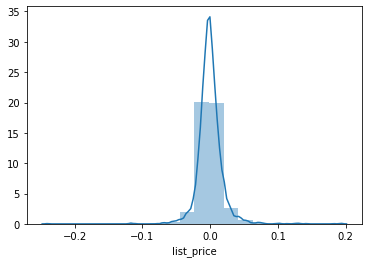

In [768]:
pf = PolynomialFeatures(3)
x_poly=pf.fit_transform(x)
x_poly
x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.3)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_hat=lr.predict(x_test)
print("MSE={}\nR2={}".format(mean_squared_error(y_test,y_hat),r2_score(y_test,y_hat)))
residuals=y_test-y_hat
sns.distplot(residuals,bins=20)

MSE=0.13521113649423602
R2=0.8758494977434611


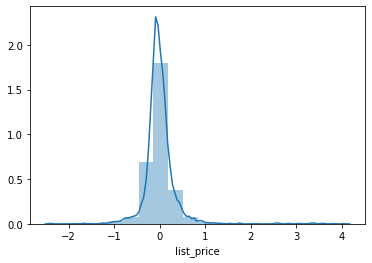

In [769]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


x=df_ss[['num_reviews','piece_count','play_star_rating','star_rating','val_star_rating','ages','review_difficulty','set_name','theme_name','country']]
y=df_ss['list_price']
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(2)
x_poly=pf.fit_transform(x)
x_poly
x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.3)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_hat=lr.predict(x_test)
print("MSE={}\nR2={}".format(mean_squared_error(y_test,y_hat),r2_score(y_test,y_hat)))
residuals=y_test-y_hat
sns.distplot(residuals,bins=20)


MSE=0.04851711393767033
R2=0.9515143462472163


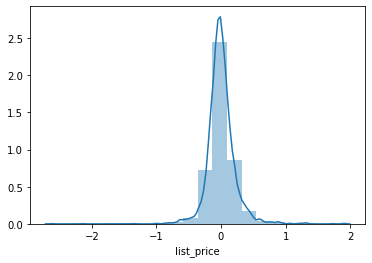

In [770]:
pf = PolynomialFeatures(3)
x_poly=pf.fit_transform(x)
x_poly
x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.3)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_hat=lr.predict(x_test)
print("MSE={}\nR2={}".format(mean_squared_error(y_test,y_hat),r2_score(y_test,y_hat)))
residuals=y_test-y_hat
sns.distplot(residuals,bins=20)

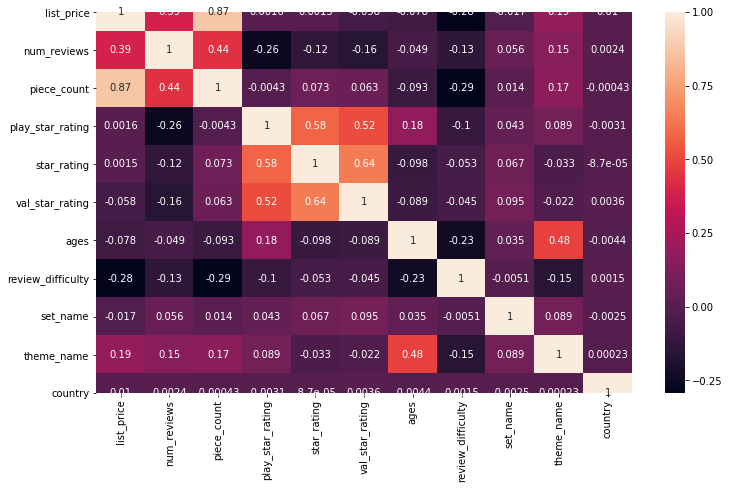

In [771]:
plt.figure(figsize=(12,7))
sns.heatmap(df_new.corr(), annot=True)
plt.show()